In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sys 
import pandas as pd
import numpy as np


In [ ]:
sys.path.insert(1, '/content/drive/MyDrive/tabular_project')
!unzip '/content/drive/MyDrive/tabular_project/titanic.zip' -d '/content/titanic'

Archive:  /content/drive/MyDrive/tabular_project/titanic.zip
replace /content/titanic/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/titanic/gender_submission.csv  
replace /content/titanic/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace /content/titanic/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/titanic/test.csv  
replace /content/titanic/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/titanic/train.csv  


In [ ]:
train=pd.read_csv('/content/titanic/train.csv', index_col=False)
test=pd.read_csv('/content/titanic/test.csv', index_col=False)

## Analyzing

In [ ]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

train.head()

Training data shape:  (891, 12)
Testing data shape:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

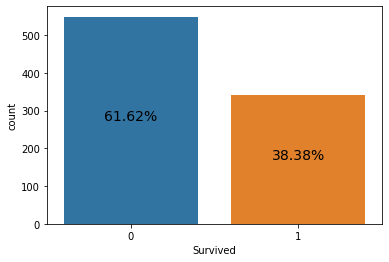

In [ ]:
import seaborn as sns

s = sns.countplot(x = 'Survived',data = train)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height / 2,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center", fontsize=14) 

# Preprocessing

## Drop unnecessary columns

In [ ]:
train_new = train.drop(['PassengerId', 'Ticket', 'Name'],axis=1)
# test_new = test.drop(['PassengerId', 'Ticket', 'Name'],axis=1)


## Filling Missing Values in Embarked and Fare

In [ ]:
train_new['Embarked'].describe()



count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
train_missing= missing_values_table(train_new)
train_missing

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [ ]:
# test_new['Fare'].describe()


In [ ]:
# test_new_missing= missing_values_table(test_new)
# test_new_missing

Here we can see that S is predominant so we will replace with S Value

In [ ]:
train_new['Embarked'] = train_new['Embarked'].replace(np.NaN, 'S')
train_new['Embarked'].isnull().sum()

0

In [ ]:
# test_new['Fare'] = test_new['Fare'].replace(np.NaN, test_new['Fare'].mean())
# test_new['Fare'].isnull().sum()



In [ ]:
# train_test = [train_new, test_new]


## Categories to int

Embarked category



In [ ]:
train_new['Embarked']=train_new['Embarked'].map({
'S':0,
'C':1,
'Q':2
})
train_new['Embarked'].head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

Sex category


In [ ]:
train_new['Sex']=train_new['Sex'].map({
'male':0,
'female':1
})
train_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,0
1,1,1,1,38.0,1,0,71.2833,C85,1
2,1,3,1,26.0,0,0,7.9250,NaN,0
3,1,1,1,35.0,1,0,53.1000,C123,0
4,0,3,0,35.0,0,0,8.0500,NaN,0


Fare Category

In [ ]:
train_new['Fare'] = train_new['Fare'].fillna(0)
train_new['Fare'] = train_new['Fare'].astype(int)


# Treat Missings Values

## Deleting Rows / Listwise Deletion

Delete all row with missing values

In [ ]:
# train_test
# train_deleting_r_age = train_new.copy()
# train_deleting_r_age.dropna(subset=['Age'],how='any',inplace=True)
# train_deleting_r_age['Age'].isnull().sum()
train_delete_row = train_new.copy()

train_delete_row.dropna(inplace=True)
train_delete_row.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
train_delete_row['Age'] = train_delete_row['Age'].astype(int)


In [ ]:
import re
train_delete_row['Deck'] = train_delete_row['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train_delete_row['Deck'] = train_delete_row['Deck'].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8})
train_delete_row['Deck'] = train_delete_row['Deck'].fillna(0)
train_delete_row['Deck'] = train_delete_row['Deck'].astype(int)
train_delete_row= train_delete_row.drop(['Cabin'], axis=1)
train_delete_row.head(15)
# train_Category_Cabin.info()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
1,1,1,1,38,1,0,71,1,3
3,1,1,1,35,1,0,53,0,3
6,0,1,0,54,0,0,51,0,5
10,1,3,1,4,1,1,16,0,7
11,1,1,1,58,0,0,26,0,3
21,1,2,0,34,0,0,13,0,4
23,1,1,0,28,0,0,35,0,1
27,0,1,0,19,3,2,263,0,3
52,1,1,1,49,1,0,76,1,4
54,0,1,0,65,0,1,61,1,2


In [ ]:

train_delete_row.to_csv('titanic/deletedRows.csv', index=False)
train_delete_row

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
1,1,1,1,38,1,0,71,1,3
3,1,1,1,35,1,0,53,0,3
6,0,1,0,54,0,0,51,0,5
10,1,3,1,4,1,1,16,0,7
11,1,1,1,58,0,0,26,0,3
...,...,...,...,...,...,...,...,...,...
871,1,1,1,47,1,1,52,0,4
872,0,1,0,33,0,0,5,0,2
879,1,1,1,56,0,1,83,1,3
887,1,1,1,19,0,0,30,0,2


## Replacing With Mean

In [ ]:
train_mean = train_new.copy()


### Age

In [ ]:
train_mean['Age'] = train_mean['Age'].replace(np.NaN, train_mean['Age'].mean())
train_mean['Age'] = train_mean['Age'].astype(int)

print(missing_values_table(train_mean))
print(train_mean.head(15))

Your selected dataframe has 9 columns.
There are 1 columns that have missing values.
       Missing Values  % of Total Values
Cabin             687               77.1
    Survived  Pclass  Sex  Age  SibSp  Parch  Fare Cabin  Embarked
0          0       3    0   22      1      0     7   NaN         0
1          1       1    1   38      1      0    71   C85         1
2          1       3    1   26      0      0     7   NaN         0
3          1       1    1   35      1      0    53  C123         0
4          0       3    0   35      0      0     8   NaN         0
5          0       3    0   29      0      0     8   NaN         2
6          0       1    0   54      0      0    51   E46         0
7          0       3    0    2      3      1    21   NaN         0
8          1       3    1   27      0      2    11   NaN         0
9          1       2    1   14      1      0    30   NaN         1
10         1       3    1    4      1      1    16    G6         0
11         1       1    1   5

### Cabin

In [ ]:
import re
train_mean['Cabin'] = train_mean['Cabin'].fillna("U0")
train_mean['Deck'] = train_mean['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train_mean['Deck'] = train_mean['Deck'].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8})
train_mean['Deck'] = train_mean['Deck'].fillna(0)
train_mean['Deck'] = train_mean['Deck'].astype(int)
train_mean['Deck']=train_mean['Deck'].replace({8: np.nan})
train_mean['Deck'] = train_mean['Deck'].fillna(round(train_mean['Deck'].mean()))
train_mean['Deck'] = train_mean['Deck'].astype(int)

train_mean= train_mean.drop(['Cabin'], axis=1)
# train_mean.info()


In [ ]:
train_mean.to_csv('titanic/mean.csv', index=False)
train_mean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,0,22,1,0,7,0,3
1,1,1,1,38,1,0,71,1,3
2,1,3,1,26,0,0,7,0,3
3,1,1,1,35,1,0,53,0,3
4,0,3,0,35,0,0,8,0,3
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,3
887,1,1,1,19,0,0,30,0,2
888,0,3,1,29,1,2,23,0,3
889,1,1,0,26,0,0,30,1,3


## Assigning An Unique Category

In [ ]:
train_unique_categ = train_new.copy()
train_unique_categ

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7,NaN,0
1,1,1,1,38.0,1,0,71,C85,1
2,1,3,1,26.0,0,0,7,NaN,0
3,1,1,1,35.0,1,0,53,C123,0
4,0,3,0,35.0,0,0,8,NaN,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13,NaN,0
887,1,1,1,19.0,0,0,30,B42,0
888,0,3,1,NaN,1,2,23,NaN,0
889,1,1,0,26.0,0,0,30,C148,1


### Ages

create unique category of ages

In [ ]:
train_unique_categ['Age'] = train_unique_categ['Age'].fillna(-1)
train_unique_categ['Age'] = train_unique_categ['Age'].astype(int)
train_unique_categ

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22,1,0,7,NaN,0
1,1,1,1,38,1,0,71,C85,1
2,1,3,1,26,0,0,7,NaN,0
3,1,1,1,35,1,0,53,C123,0
4,0,3,0,35,0,0,8,NaN,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,NaN,0
887,1,1,1,19,0,0,30,B42,0
888,0,3,1,-1,1,2,23,NaN,0
889,1,1,0,26,0,0,30,C148,1


In [ ]:
train_unique_categ.loc[ train_unique_categ['Age'] < 0, 'Age'] = 0
train_unique_categ.loc[(train_unique_categ['Age'] >= 0) & (train_unique_categ['Age'] <= 10), 'Age'] = 1
train_unique_categ.loc[(train_unique_categ['Age'] > 10) & (train_unique_categ['Age'] <= 18), 'Age'] = 2
train_unique_categ.loc[(train_unique_categ['Age'] > 18) & (train_unique_categ['Age'] <= 25), 'Age'] = 3
train_unique_categ.loc[(train_unique_categ['Age'] > 25) & (train_unique_categ['Age'] <= 31), 'Age'] = 4
train_unique_categ.loc[(train_unique_categ['Age'] > 31) & (train_unique_categ['Age'] <= 45), 'Age'] = 5
train_unique_categ.loc[(train_unique_categ['Age'] > 45) & (train_unique_categ['Age'] <= 60), 'Age'] = 6
train_unique_categ.loc[ train_unique_categ['Age'] > 60, 'Age'] = 7
train_unique_categ

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,3,1,0,7,NaN,0
1,1,1,1,5,1,0,71,C85,1
2,1,3,1,4,0,0,7,NaN,0
3,1,1,1,5,1,0,53,C123,0
4,0,3,0,5,0,0,8,NaN,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,4,0,0,13,NaN,0
887,1,1,1,3,0,0,30,B42,0
888,0,3,1,1,1,2,23,NaN,0
889,1,1,0,4,0,0,30,C148,1


### Cabin

In [ ]:
import re
train_unique_categ['Cabin'] = train_unique_categ['Cabin'].fillna("U0")
train_unique_categ['Deck'] = train_unique_categ['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train_unique_categ['Deck'] = train_unique_categ['Deck'].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8})
train_unique_categ['Deck'] = train_unique_categ['Deck'].fillna(0)
train_unique_categ['Deck'] = train_unique_categ['Deck'].astype(int)
train_unique_categ= train_unique_categ.drop(['Cabin'], axis=1)
print(train_unique_categ.head(15))
train_unique_categ.info()

    Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Deck
0          0       3    0    3      1      0     7         0     8
1          1       1    1    5      1      0    71         1     3
2          1       3    1    4      0      0     7         0     8
3          1       1    1    5      1      0    53         0     3
4          0       3    0    5      0      0     8         0     8
5          0       3    0    1      0      0     8         2     8
6          0       1    0    6      0      0    51         0     5
7          0       3    0    1      3      1    21         0     8
8          1       3    1    4      0      2    11         0     8
9          1       2    1    2      1      0    30         1     8
10         1       3    1    1      1      1    16         0     7
11         1       1    1    6      0      0    26         0     3
12         0       3    0    3      0      0     8         0     8
13         0       3    0    5      1      5    31         0  

In [ ]:
train_unique_categ.to_csv('titanic/uniqueCategory.csv', index=False)
train_unique_categ

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,0,3,1,0,7,0,8
1,1,1,1,5,1,0,71,1,3
2,1,3,1,4,0,0,7,0,8
3,1,1,1,5,1,0,53,0,3
4,0,3,0,5,0,0,8,0,8
...,...,...,...,...,...,...,...,...,...
886,0,2,0,4,0,0,13,0,8
887,1,1,1,3,0,0,30,0,2
888,0,3,1,1,1,2,23,0,8
889,1,1,0,4,0,0,30,1,3


## Using Algorithms Which Support Missing Values | KNN Imputer 5 nearest neighbours

In [ ]:
train_knn = train_new.copy()
train_knn

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7,NaN,0
1,1,1,1,38.0,1,0,71,C85,1
2,1,3,1,26.0,0,0,7,NaN,0
3,1,1,1,35.0,1,0,53,C123,0
4,0,3,0,35.0,0,0,8,NaN,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13,NaN,0
887,1,1,1,19.0,0,0,30,B42,0
888,0,3,1,NaN,1,2,23,NaN,0
889,1,1,0,26.0,0,0,30,C148,1


In [ ]:
import re
train_knn['Cabin'] = train_knn['Cabin'].fillna("U0")
train_knn['Deck'] = train_knn['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train_knn['Deck'] = train_knn['Deck'].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8})
train_knn['Deck'] = train_knn['Deck'].fillna(0)
train_knn['Deck'] = train_knn['Deck'].astype(int)
train_knn['Deck']=train_knn['Deck'].replace({8: np.nan})

train_knn= train_knn.drop(['Cabin'], axis=1)
train_knn

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,0,22.0,1,0,7,0,NaN
1,1,1,1,38.0,1,0,71,1,3.0
2,1,3,1,26.0,0,0,7,0,NaN
3,1,1,1,35.0,1,0,53,0,3.0
4,0,3,0,35.0,0,0,8,0,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13,0,NaN
887,1,1,1,19.0,0,0,30,0,2.0
888,0,3,1,NaN,1,2,23,0,NaN
889,1,1,0,26.0,0,0,30,1,3.0


In [ ]:

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_knn = pd.DataFrame(scaler.fit_transform(train_knn), columns = train_knn.columns)
train_knn

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0.0,1.0,0.0,0.271174,0.125,0.000000,0.013672,0.0,NaN
1,1.0,0.0,1.0,0.472229,0.125,0.000000,0.138672,0.5,0.428571
2,1.0,1.0,1.0,0.321438,0.000,0.000000,0.013672,0.0,NaN
3,1.0,0.0,1.0,0.434531,0.125,0.000000,0.103516,0.0,0.428571
4,0.0,1.0,0.0,0.434531,0.000,0.000000,0.015625,0.0,NaN
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.334004,0.000,0.000000,0.025391,0.0,NaN
887,1.0,0.0,1.0,0.233476,0.000,0.000000,0.058594,0.0,0.285714
888,0.0,1.0,1.0,NaN,0.125,0.333333,0.044922,0.0,NaN
889,1.0,0.0,0.0,0.321438,0.000,0.000000,0.058594,0.5,0.428571


In [ ]:
imputer = KNNImputer(n_neighbors=5)
train_knn = pd.DataFrame(imputer.fit_transform(train_knn),columns = train_knn.columns)
train_knn

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0.0,1.0,0.0,0.271174,0.125,0.000000,0.013672,0.0,0.800000
1,1.0,0.0,1.0,0.472229,0.125,0.000000,0.138672,0.5,0.428571
2,1.0,1.0,1.0,0.321438,0.000,0.000000,0.013672,0.0,0.857143
3,1.0,0.0,1.0,0.434531,0.125,0.000000,0.103516,0.0,0.428571
4,0.0,1.0,0.0,0.434531,0.000,0.000000,0.015625,0.0,0.800000
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.334004,0.000,0.000000,0.025391,0.0,0.542857
887,1.0,0.0,1.0,0.233476,0.000,0.000000,0.058594,0.0,0.285714
888,0.0,1.0,1.0,0.273687,0.125,0.333333,0.044922,0.0,0.942857
889,1.0,0.0,0.0,0.321438,0.000,0.000000,0.058594,0.5,0.428571


In [ ]:
train_knn.isna().any()
train_knn

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0.0,1.0,0.0,0.271174,0.125,0.000000,0.013672,0.0,0.800000
1,1.0,0.0,1.0,0.472229,0.125,0.000000,0.138672,0.5,0.428571
2,1.0,1.0,1.0,0.321438,0.000,0.000000,0.013672,0.0,0.857143
3,1.0,0.0,1.0,0.434531,0.125,0.000000,0.103516,0.0,0.428571
4,0.0,1.0,0.0,0.434531,0.000,0.000000,0.015625,0.0,0.800000
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.334004,0.000,0.000000,0.025391,0.0,0.542857
887,1.0,0.0,1.0,0.233476,0.000,0.000000,0.058594,0.0,0.285714
888,0.0,1.0,1.0,0.273687,0.125,0.333333,0.044922,0.0,0.942857
889,1.0,0.0,0.0,0.321438,0.000,0.000000,0.058594,0.5,0.428571


In [ ]:
train_knn.to_csv('titanic/knn.csv', index=False)
train_knn

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,0,3,1,0,7,0,8
1,1,1,1,5,1,0,71,1,3
2,1,3,1,4,0,0,7,0,8
3,1,1,1,5,1,0,53,0,3
4,0,3,0,5,0,0,8,0,8
...,...,...,...,...,...,...,...,...,...
886,0,2,0,4,0,0,13,0,8
887,1,1,1,3,0,0,30,0,2
888,0,3,1,1,1,2,23,0,8
889,1,1,0,4,0,0,30,1,3


# Accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression

def logisticRegression(train_f):
  split = int(0.78*train_f.shape[0])
  x_train=train_f.iloc[:split,1:]
  x_test=train_f.iloc[split:,1:]
  y_train=train_f.iloc[:split,0]
  y_test=train_f.iloc[split:,0]
  # print(x_train.shape,y_train.shape)
  # print(x_test.shape,y_test.shape)
  lr=LogisticRegression(random_state=0, max_iter=1000)
  lr.fit(x_train,y_train)
  acc=lr.score(x_test,y_test)*100
  print('accuracy is :',round(acc,2))



In [ ]:

# Logistic Regression :
print("logistic Regression: Replacing With Mean")
logisticRegression(train_mean)
print("logistic Regression: Deleting Rows")
logisticRegression(train_delete_row)
print("logistic Regression: Unique Category")
logisticRegression(train_unique_categ)
print("logistic Regression: KNN")
logisticRegression(train_knn)

logistic Regression: Replacing With Mean
accuracy is : 83.76
logistic Regression: Deleting Rows
accuracy is : 70.73
logistic Regression: Unique Category
accuracy is : 81.73
logistic Regression: KNN
accuracy is : 83.25


# Detecting Missing values

The Goal here is to get an idea of the distribution of missing values.

### Proportion of Missings values between train and test

In [ ]:
train_missing= missing_values_table(train)
train_missing

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [ ]:
test_missing= missing_values_table(test)
test_missing



Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


### Visual

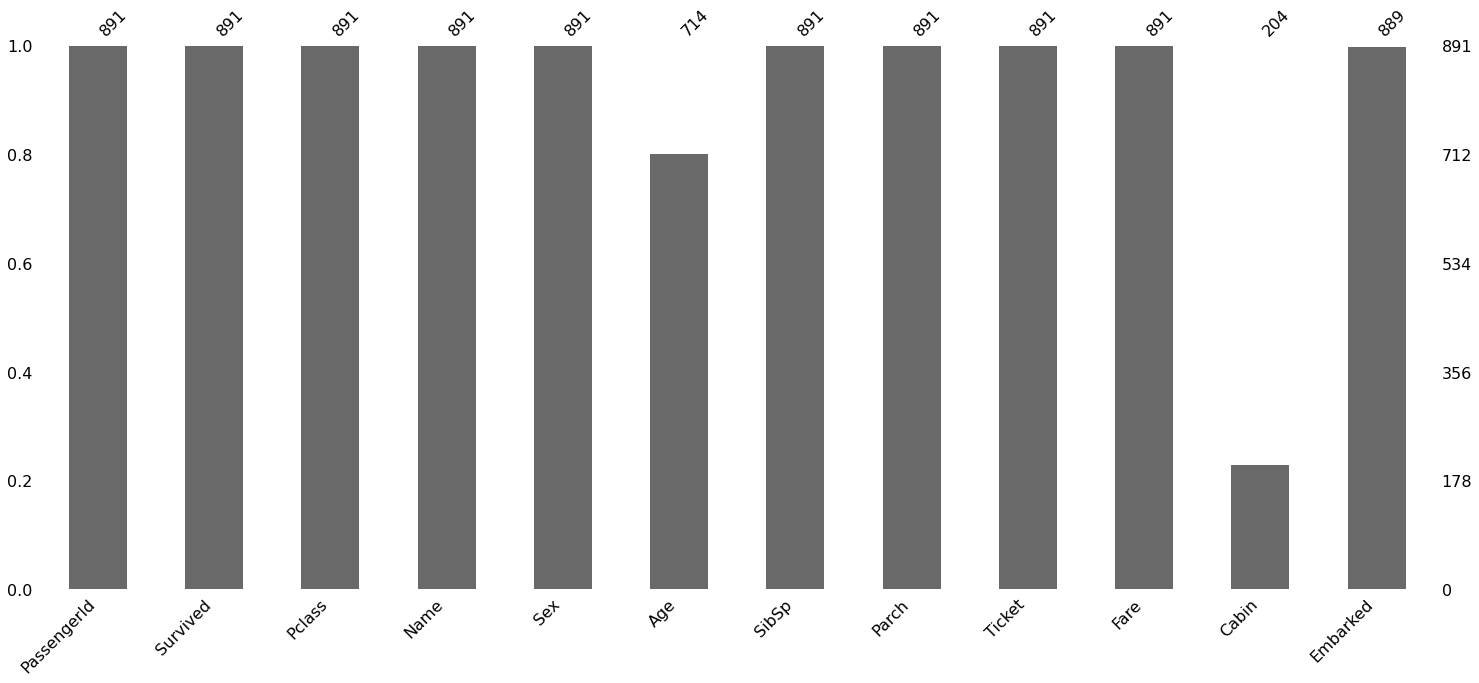

In [ ]:
import missingno as msno

msno.bar(train)


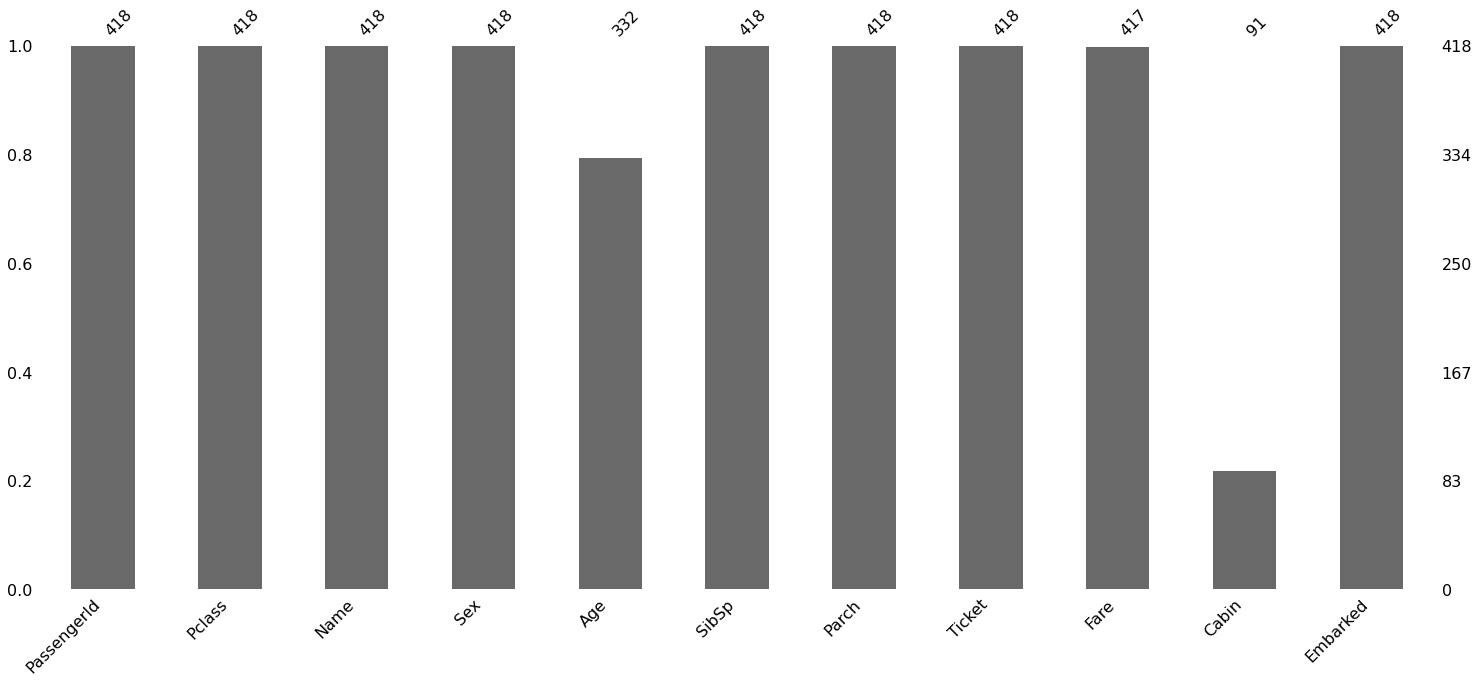

In [ ]:
msno.bar(test)


Both the train and test set have the same proportion of the missing values.



### Visualizing the locations of the missing data


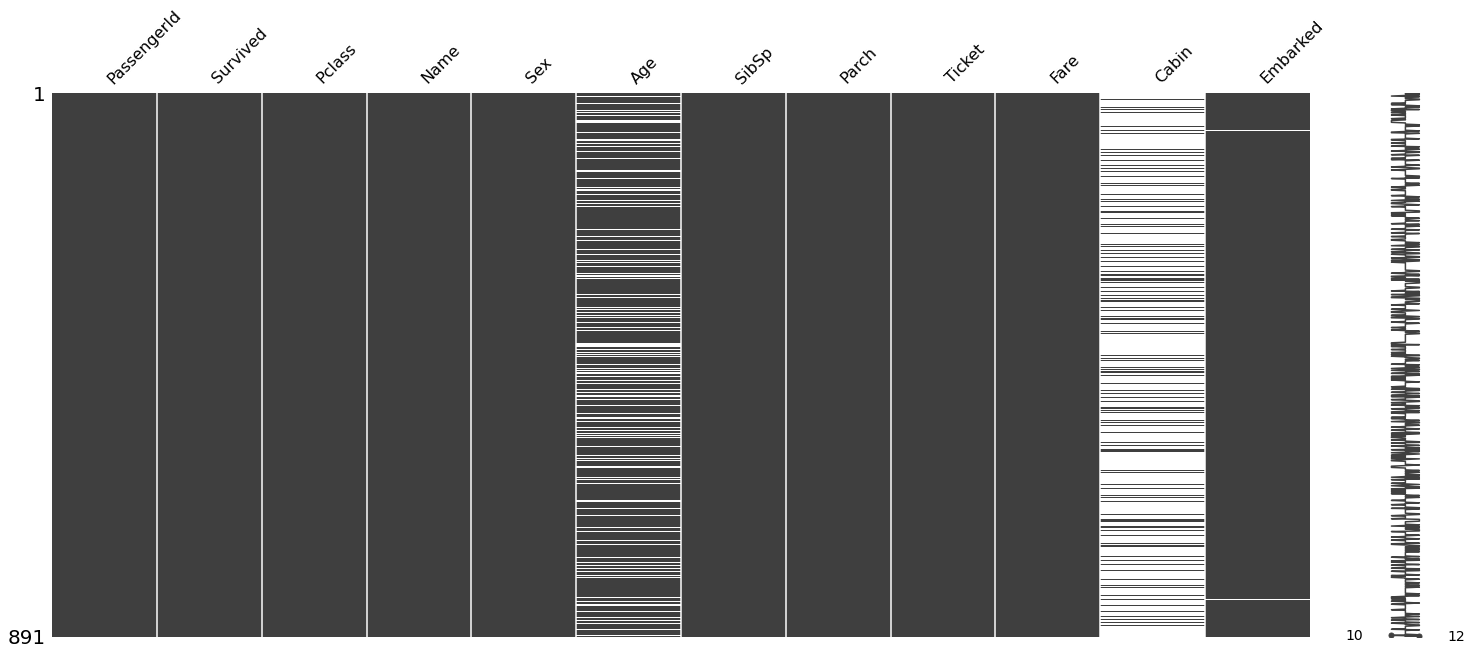

In [ ]:
msno.matrix(train)

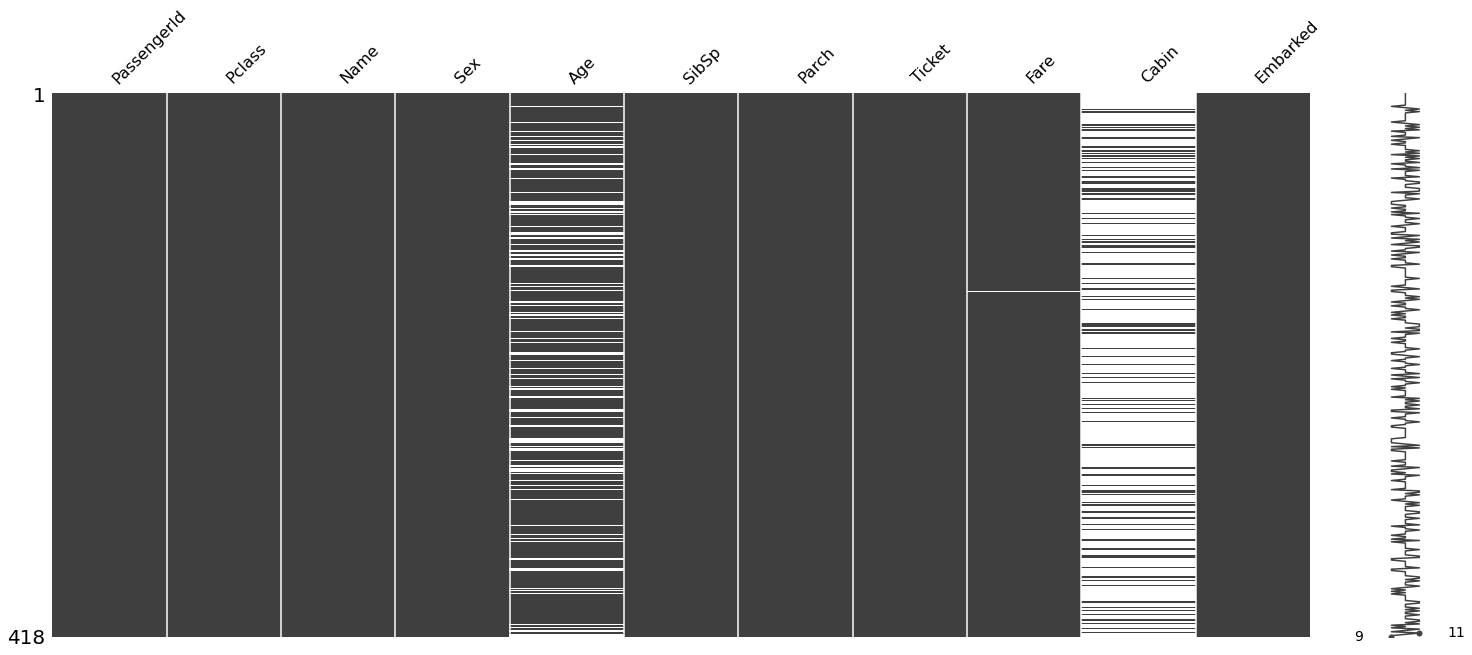

In [ ]:
msno.matrix(test)

### Finding reason for missing data

Check for pattern in the missing values by sorting

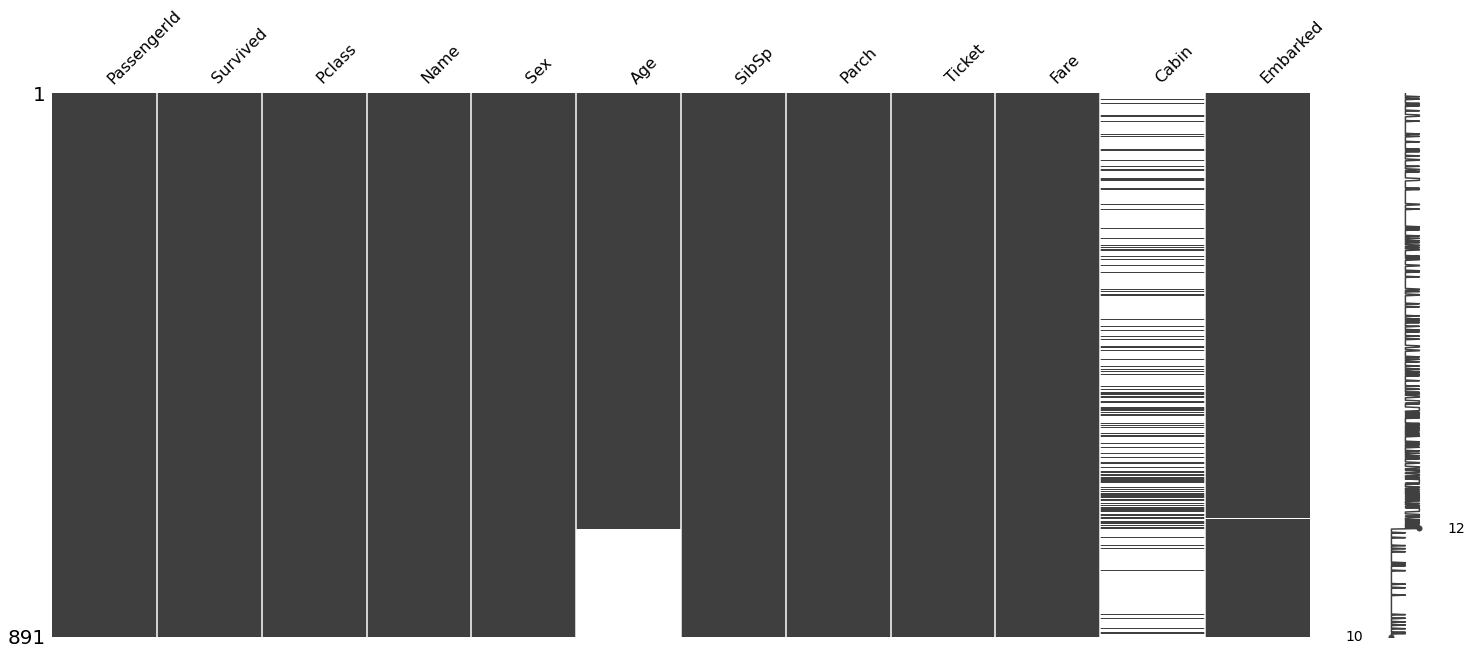

In [ ]:
#sorted by Age
sorted = train.sort_values('Age')
msno.matrix(sorted)

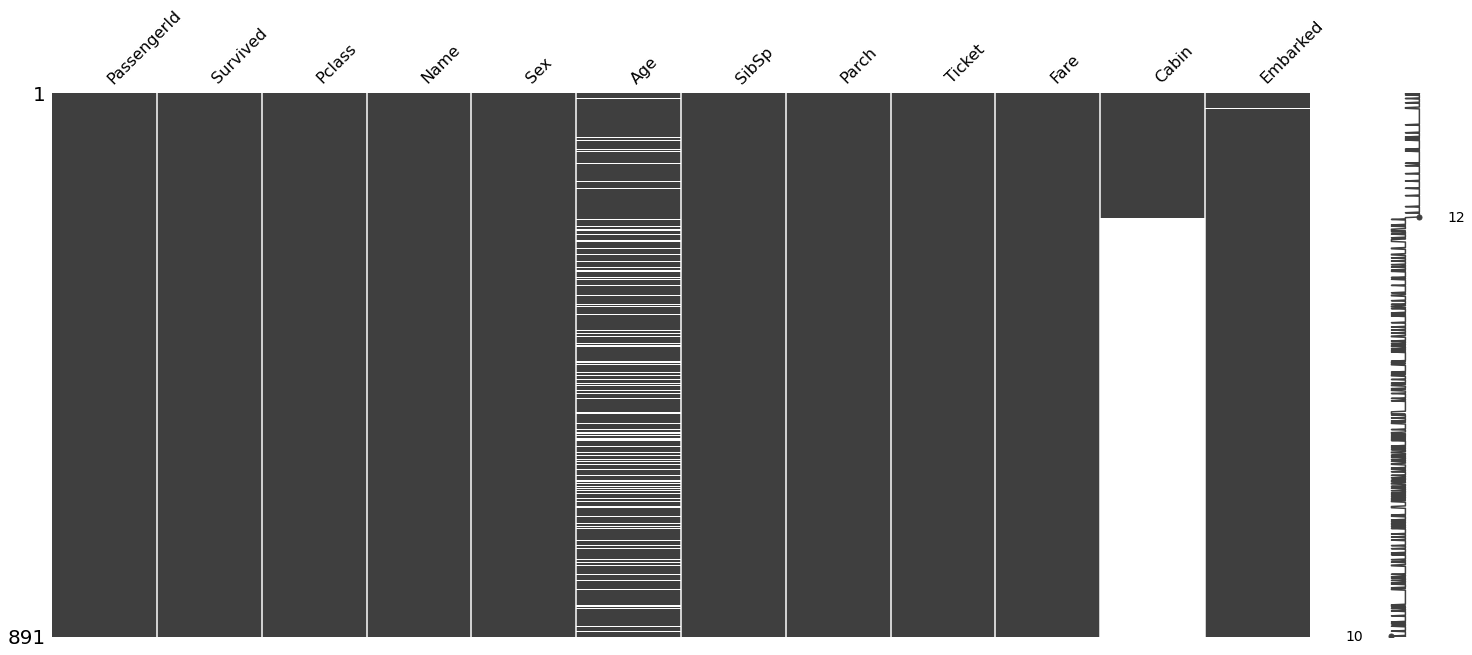

In [ ]:
#sorted by Cabin
sorted = train.sort_values('Cabin')
msno.matrix(sorted)

It is Obvious that here is no relation between the missingness in Age and Cabin column. We can draw a Heatmap among the different variables in the dataset to be sure.

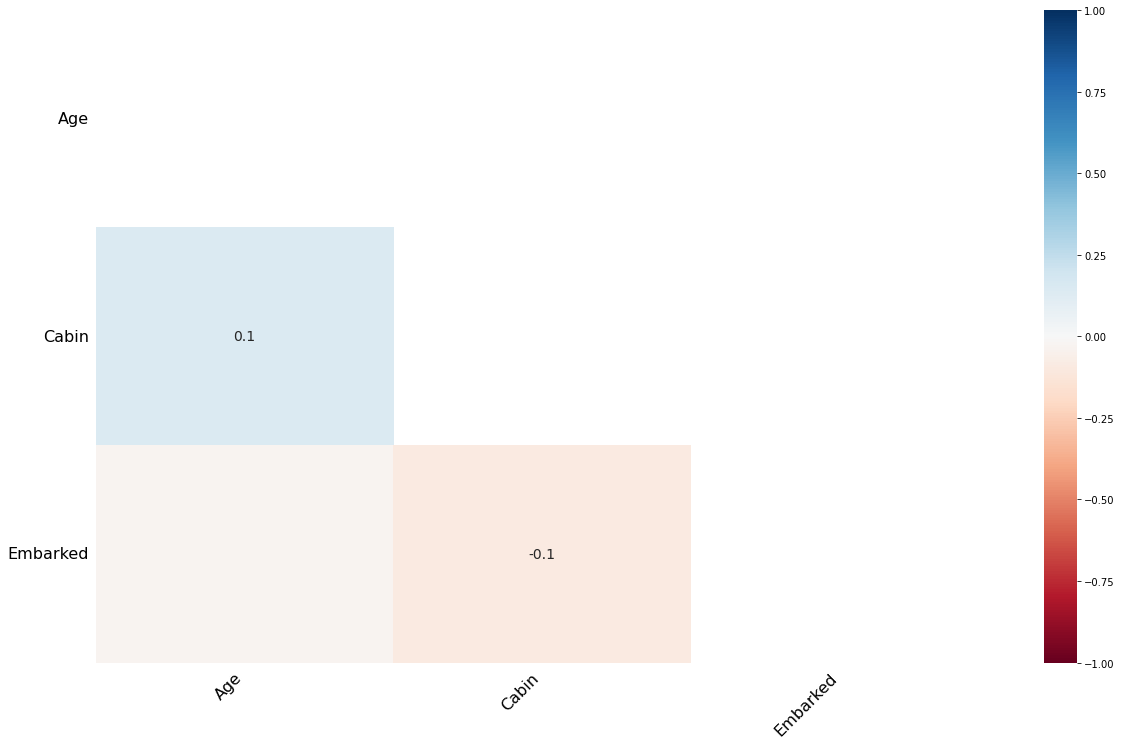

In [ ]:
msno.heatmap(train)


we can see that there is no strong correlations between missing values of different features. 
Low correlations further indicate that the data are MAR.

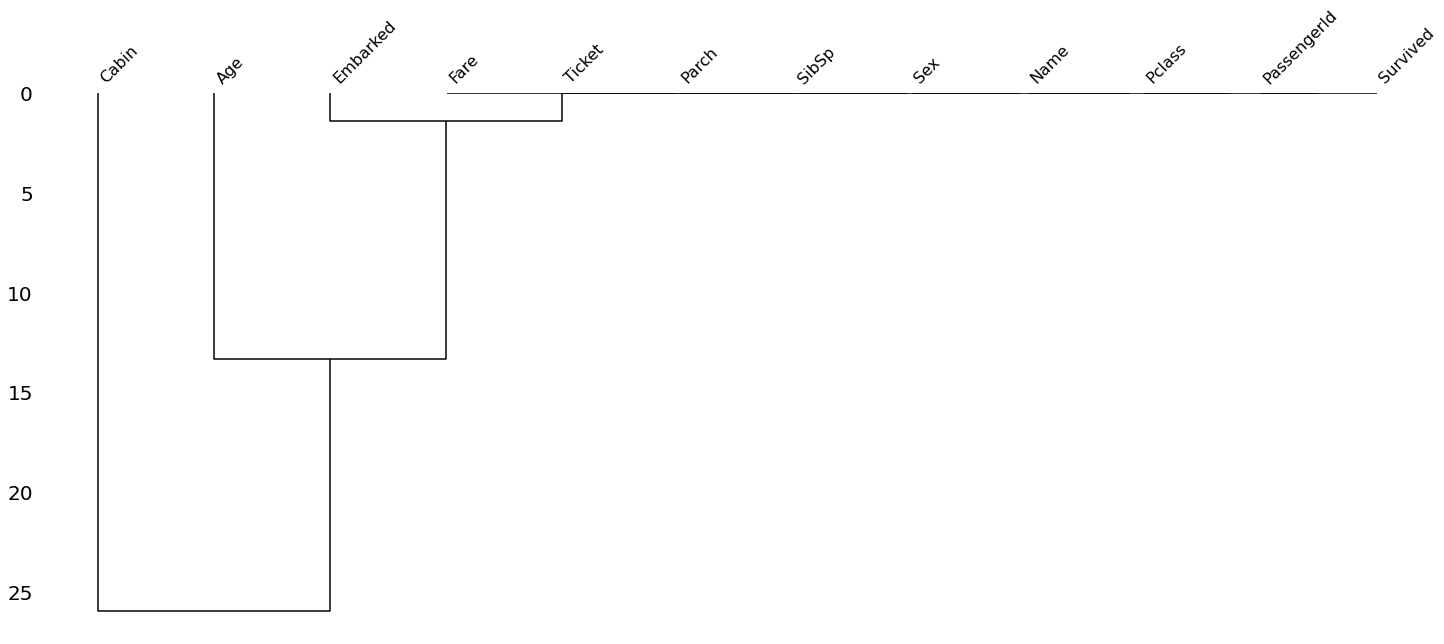

In [ ]:
msno.dendrogram(train)


the missingness of Embarked tends to be more similar to Age than to Cabin